In [6]:
import csv
import json
import os
import requests

from io import StringIO

from dotenv import load_dotenv
from sqlalchemy import create_engine

In [4]:

# Request utils
def download_url(url, save_path, chunk_size=128):
    """Download file from a URL and save to `save_path`
    
    Taken from: https://stackoverflow.com/a/9419208/8159847
    """
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

In [7]:
download_url('https://www.congreso.es/opendata/votaciones', r'data')

In [ ]:



# Database utils
def psql_insert_copy(table, conn, keys, data_iter):
    """
    Alternative to_sql() *method* for DBs that support COPY FROM
    Taken from https://pandas.pydata.org/docs/user_guide/io.html#io-sql-method

    Parameters
    ----------
    table : pandas.io.sql.SQLTable
    conn : sqlalchemy.engine.Engine or sqlalchemy.engine.Connection
    keys : list of str
        Column names
    data_iter : Iterable that iterates the values to be inserted
    """
    # gets a DBAPI connection that can provide a cursor
    dbapi_conn = conn.connection
    with dbapi_conn.cursor() as cur:
        s_buf = StringIO()
        writer = csv.writer(s_buf)
        writer.writerows(data_iter)
        s_buf.seek(0)

        columns = ', '.join('"{}"'.format(k) for k in keys)
        if table.schema:
            table_name = '{}.{}'.format(table.schema, table.name)
        else:
            table_name = table.name

        sql = 'COPY {} ({}) FROM STDIN WITH CSV'.format(
            table_name, columns)
        cur.copy_expert(sql=sql, file=s_buf)


def create_supabase_engine():
    """Get Supabase's SQLAlchemy engine"""

    load_dotenv()
    SUPABASE_PASSWORD = os.environ['SUPABASE_PASSWORD']
    SUPABASE_URL = os.environ['SUPABASE_URL']

    conn_string = f'postgresql://postgres:{SUPABASE_PASSWORD}@{SUPABASE_URL}:5432/postgres'
    engine = create_engine(conn_string)

    return engine


def load_to_supabase(df, table_name, if_exists='replace'):
    """Simple wrapper of Pandas.DataFrame.to_sql with defaults for our Supabase DB"""
    supabase_engine = create_supabase_engine()

    df.to_sql(table_name, supabase_engine, if_exists, method=psql_insert_copy)


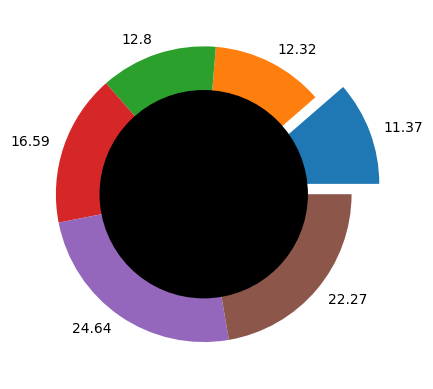

In [8]:
import matplotlib.pyplot as plt
import numpy as np
data = np.random.randint(20, 100, 6)
total = sum(data)
data_per = data/total*100
explode = (0.2, 0, 0, 0, 0, 0)
plt.pie(data_per, explode = explode, labels = [round(i,2) for i in (list(data_per))])
circle = plt.Circle((0,0), 0.7 ,color='Black')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

ValueError: 'label' must be of length 'x'

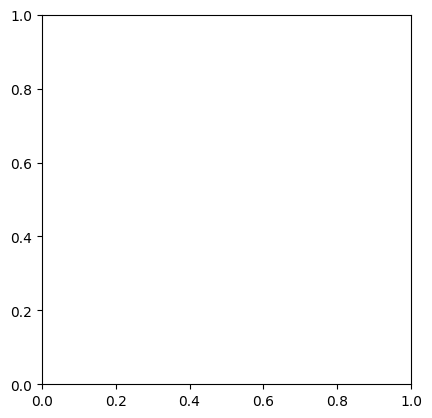

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
data = np.array([4, 3, 2, 1 , 10])

plt.pie(data, radius=2, labels = [round(i,2) for i in (list(data_per))])

data = np.array([4, 3, 2, 1 , 10])
total = sum(data)
data_per = data/total*100
explode = (1, 0, 0, 0, 0, 0)

plt.figure(facecolor='white')
 
ax = plt.axes()

wedges, texts = ax.pie(data, radius=1, labels = [round(i,2) for i in (list(data_per))])
wedges[0].set_radius(1.3)
wedges[1].set_radius(1)
wedges[2].set_radius(1)
wedges[3].set_radius(1)
wedges[4].set_visible(False)


circle = plt.Circle((0,0), 0.7 ,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()


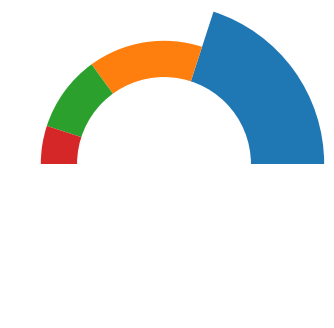

In [10]:
%matplotlib inline
data = [4, 3, 2, 1 , 10]

fig, ax = plt.subplots(figsize=(4,4))

wedges, texts = ax.pie(data, radius=1)

 

wedges[0].set_radius(1.3)
wedges[1].set_radius(1)
wedges[2].set_radius(1)
wedges[3].set_radius(1)
wedges[4].set_visible(False)

circle = plt.Circle((0,0), 0.7 ,color='white')
p=plt.gcf()
p.gca().add_artist(circle)

 
plt.show()

